In [99]:
import numpy as np
import pandas as pd

In [100]:
df=pd.read_csv("./datingTestSet.txt",header=None,sep='\s+')


In [101]:
feature=df[[0,1,2]]
target=df[3]
feature

,0,1,2
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296
...,...,...,...
995,11145,3.410627,0.631838
996,68846,9.974715,0.669787
997,26575,10.650102,0.866627
998,48111,9.134528,0.728045


In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=2020)

In [103]:
x_train

,0,1,2
983,9493,6.724021,0.563044
337,15941,0.000000,0.061191
434,81046,15.833048,1.568245
193,52914,3.976796,1.043109
437,39299,6.325139,0.605109
...,...,...,...
707,29241,7.791833,1.111416
630,7052,2.633627,1.097866
323,67705,6.038620,1.509646
392,56557,11.746200,1.695517


In [104]:
target

0      largeDoses
1      smallDoses
2       didntLike
3       didntLike
4       didntLike
          ...    
995    smallDoses
996     didntLike
997    largeDoses
998    largeDoses
999    largeDoses
Name: 3, Length: 1000, dtype: object

In [105]:
# 归一化~~ 对训练集特征进行预处理
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [106]:
mm=MinMaxScaler()
m_x_train=mm.fit_transform(x_train)

In [107]:
m_x_train

array([[0.10400666, 0.32142592, 0.33162236],
       [0.17465187, 0.        , 0.03543224],
       [0.88795153, 0.75686141, 0.92488496],
       ...,
       [0.74178563, 0.28866195, 0.89030024],
       [0.61964655, 0.56149931, 1.        ],
       [0.13440996, 0.26364057, 0.14719768]])

In [108]:
m_x_train.shape

(800, 3)

In [109]:
# 对测试集数据进行归一化处理
m_x_test=mm.transform(x_test)
m_x_test.shape

(200, 3)

In [110]:
scores=[]
ks=[]
for k in range(3,55):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(m_x_train,y_train)
    score=knn.score(m_x_test,y_test)
    scores.append(score)
    ks.append(k)

In [111]:
import matplotlib.pyplot as plt

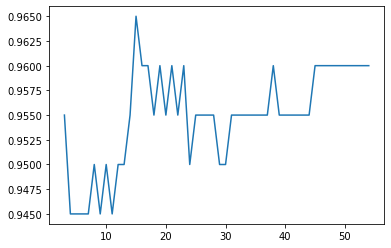

In [112]:
scores_arr=np.array(scores)
k_arr=np.array(ks)
plt.plot(k_arr,scores_arr)

In [113]:
scores_arr.argmax()

12

In [114]:
k_arr[12]

15

In [115]:
knn=KNeighborsClassifier(n_neighbors=15).fit(m_x_train,y_train)

In [116]:
knn.score(m_x_test,y_test)

0.965

In [117]:
test1=[22200,0.2,0.1]
test1=mm.transform([test1])
test1

array([[0.24322636, 0.00956053, 0.05833704]])

In [118]:
knn.predict(test1)

array(['smallDoses'], dtype=object)

In [119]:
y_test

725    largeDoses
986    smallDoses
815     didntLike
656    smallDoses
469    smallDoses
          ...    
871    largeDoses
947     didntLike
258     didntLike
38     largeDoses
227     didntLike
Name: 3, Length: 200, dtype: object

In [120]:
x_train.shape

(800, 3)

In [121]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [122]:
iris=load_iris()
feature=iris.data
target=iris.target
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.2,random_state=1996)
cross_val_score(knn,x_train,y_train,cv=5).mean()

0.7

In [126]:
scores=[]
cvs=[]
for i in range(3,22):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=6).mean()
    scores.append(score)
    cvs.append(i)

In [127]:
scores

[0.9,
 0.9333333333333332,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333332,
 0.8333333333333334,
 0.8333333333333334,
 0.6999999999999998,
 0.6999999999999998,
 0.6999999999999998,
 0.6999999999999998,
 0.6999999999999998,
 0.6333333333333334,
 0.6333333333333334,
 0.5]

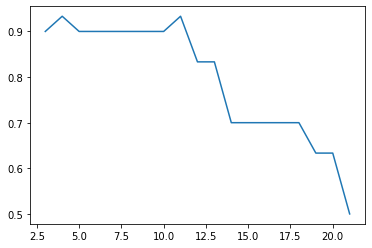

In [128]:
plt.plot(cvs,scores)

In [130]:
scores=np.array(scores)
scores.argmax()

1

In [131]:
cvs[1]

4